In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**ABOUT THE DATASET**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into FIRE (138 classes) and NOT FIRE (106 classes) classes.

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely   â€œFireâ€ and â€œnot Fireâ€



In [66]:
#read and display the dataset
df = pd.read_excel('Algerian_forest_fires_dataset_UPDATE.xlsx')
df.head()

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [67]:
#check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5    RH          244 non-null    int64  
 6    Ws          244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


# Data Cleaning

In [68]:
#check missing values
df[df.isnull().any(axis=1)]

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,Sidi-Bel-Abbes,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [69]:
#drop missing value
df.dropna(inplace=True)

In [70]:
#check unique values in region feature
df['region'].unique()

array(['Bejaia ', 'Sidi-Bel-Abbes '], dtype=object)

In [71]:
#map the values as 1 and 0
df['region'] = df['region'].map({'Bejaia ':0,'Sidi-Bel-Abbes ':1})

In [72]:
#Change the dtypes of region, DC, and FWI
df['region'] = df['region'].astype(int)
df['DC'] = df['DC'].astype(float)
df['FWI'] = df['FWI'].astype(float)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5    RH          243 non-null    int64  
 6    Ws          243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [74]:
#check the missing values
df.isnull().sum()

,0
region,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0


In [75]:
#reset the index
df.reset_index(drop = True)

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,0,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,0,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,1,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
240,1,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,1,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [76]:
#check if there are any white spaces in column names
df.columns

Index(['region', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [77]:
#remove whitespace
df.columns = df.columns.str.strip()
df.columns

Index(['region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [78]:
#check the unique values of classes
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [79]:
#Cleaning the categories of classes feature
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),"Not Fire", "Fire")

In [96]:
#save the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset_clean.csv', index = False)

# Exploratory Data Analysis

In [88]:
#consider a copy of the dataset
df_copy = df.drop(['day', 'month', 'year'], axis = 1)
df_copy.head()

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not Fire
1,0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not Fire
2,0,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not Fire
3,0,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not Fire
4,0,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not Fire


In [89]:
#encoding of the classes features
df_copy['Classes'] = np.where(df_copy['Classes']=='Not Fire',0,1)

In [90]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


<ipython-input-91-0bb862712e3a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


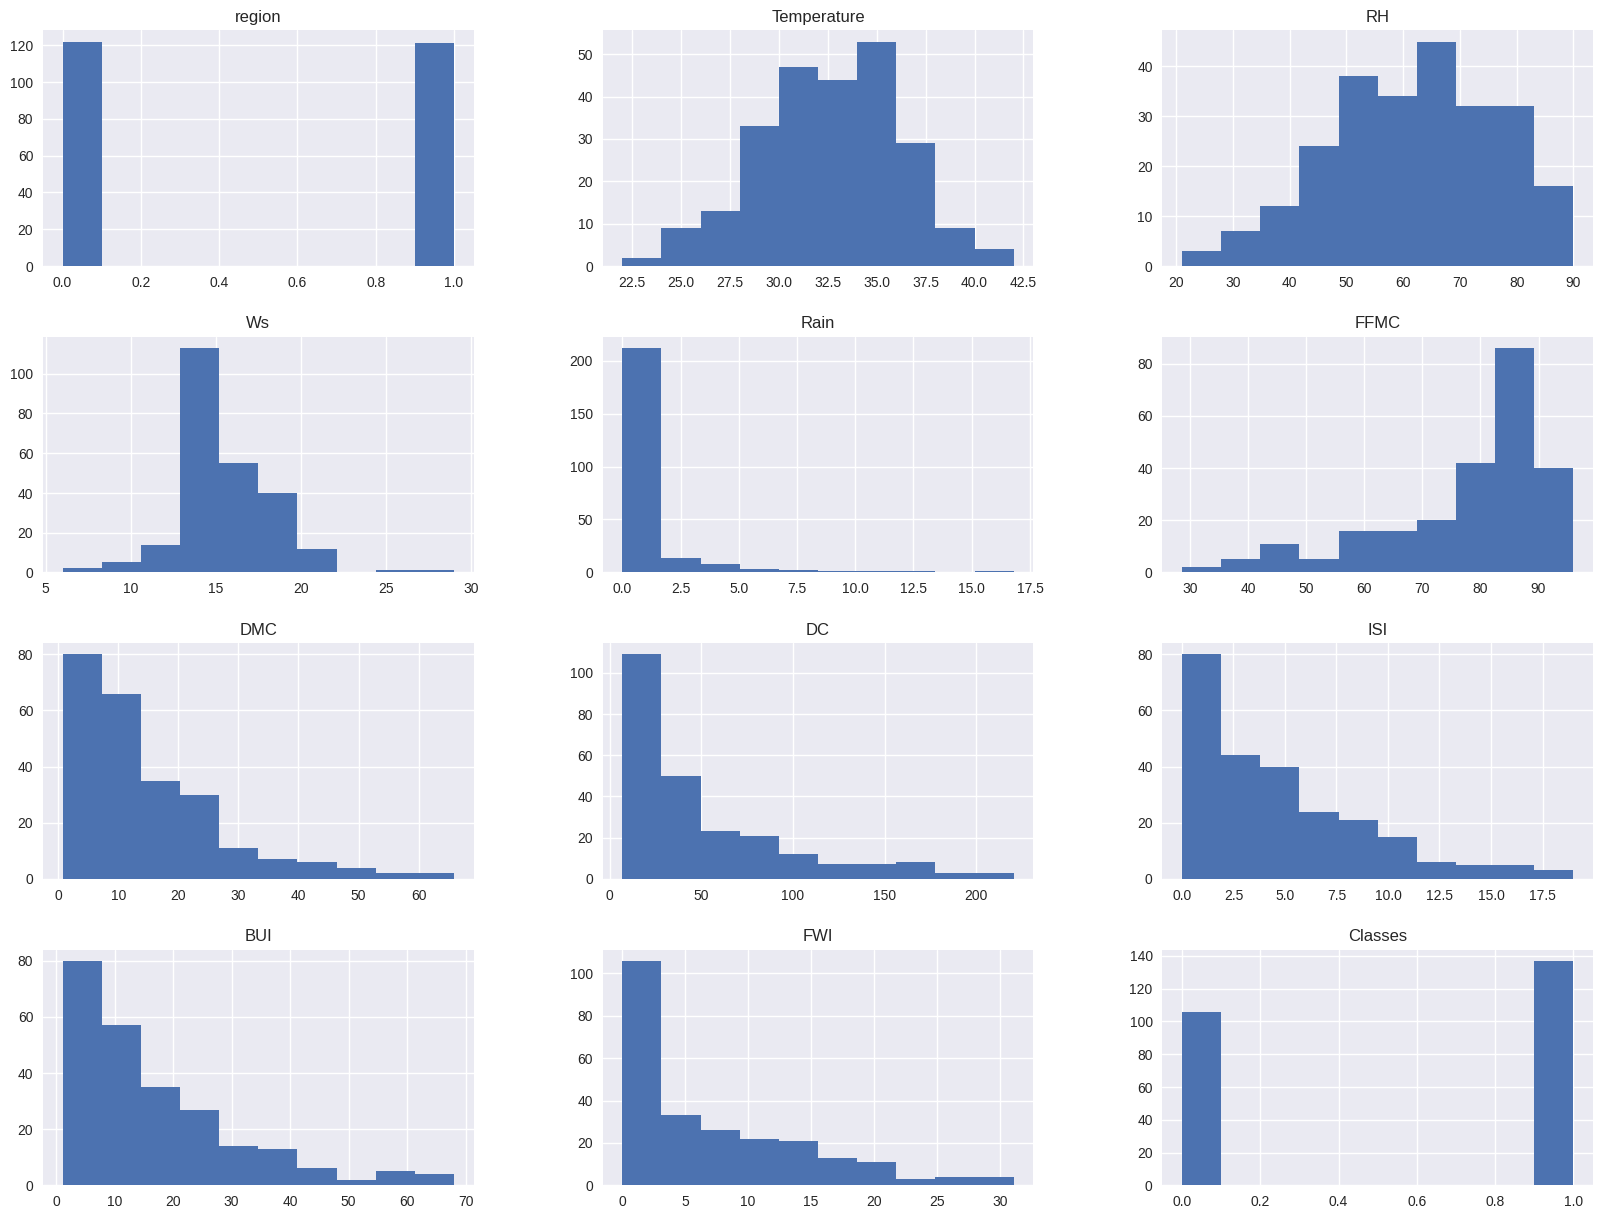

In [91]:
#plot histogram
plt.style.use('seaborn')
df_copy.hist(figsize=(20, 15))
plt.show()


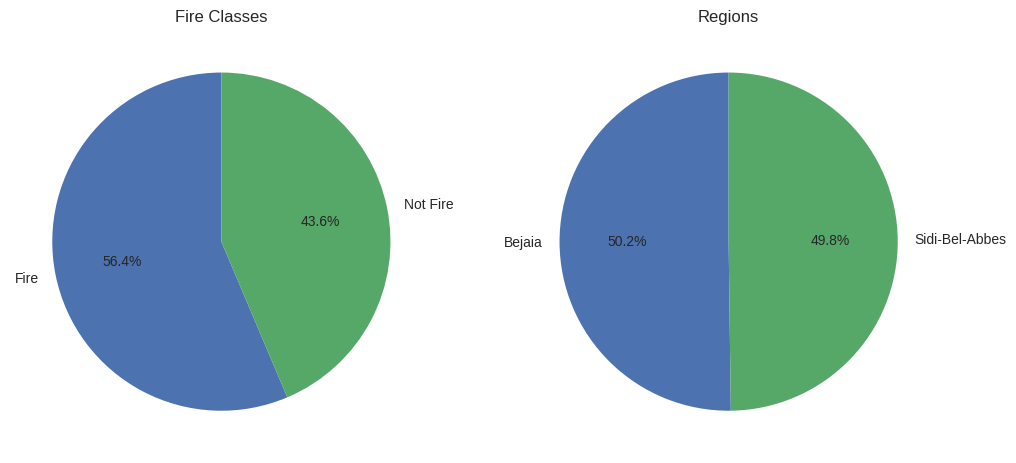

In [92]:
#plot a pie chart of Classes and Regions
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'Classes'
classes_counts = df_copy['Classes'].value_counts()
labels = ['Fire', 'Not Fire']
axes[0].pie(classes_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Fire Classes')

# Pie chart for 'region'
region_counts = df_copy['region'].value_counts()
labels = ['Bejaia', 'Sidi-Bel-Abbes']
axes[1].pie(region_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Regions')

plt.show()


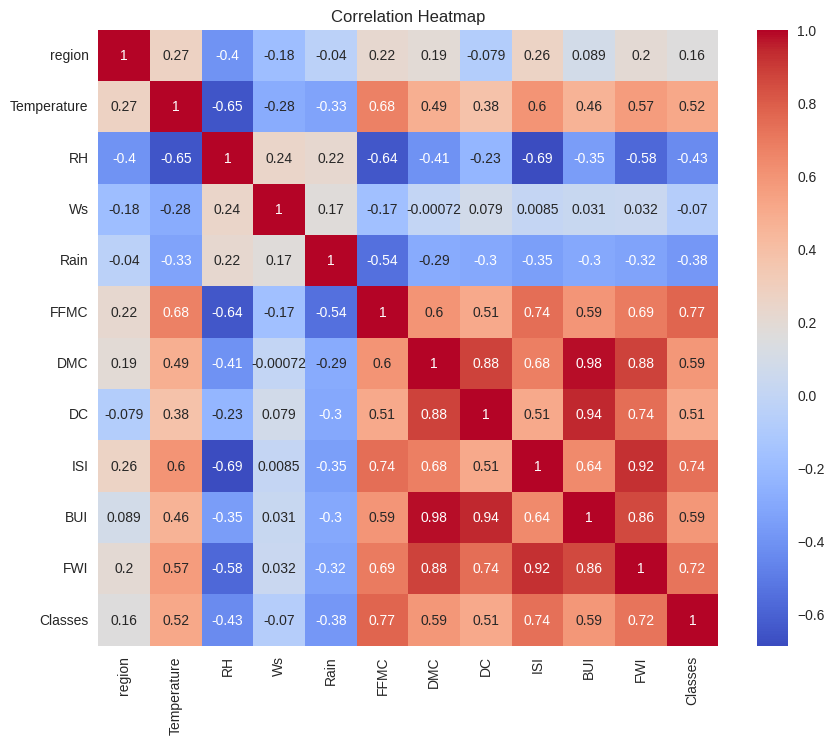

In [93]:
#create a heatmap with score
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

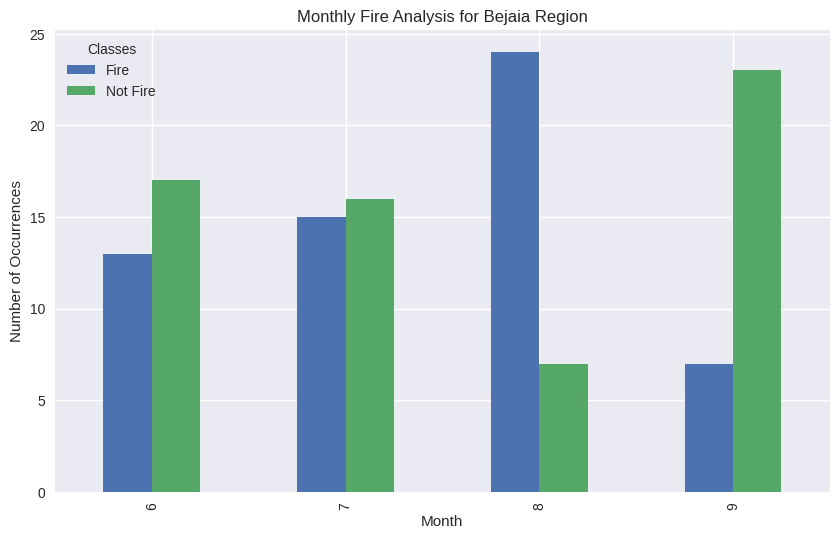

In [94]:
#monthly fire analysis of bejaia region
# Filter data for Bejaia region
bejaia_df = df[df['region'] == 0]

# Group by month and classes, then count occurrences
monthly_fire_analysis = bejaia_df.groupby(['month', 'Classes'])['Classes'].count().unstack()

# Plot the analysis
monthly_fire_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Fire Analysis for Bejaia Region')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
# plt.legend(['Not Fire', 'Fire'])
plt.show()


**Observation**
August month has the most number of fire in the Bejaia Region

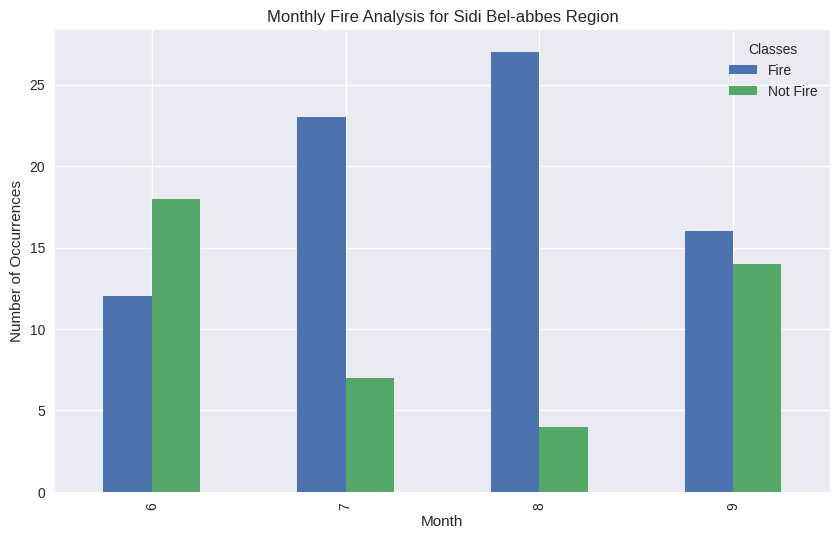

In [95]:
#monthly fire analysis of abbes region
#filter data for Sidi Bel-abbes
abbes_df = df[df['region'] == 1]
# Group by month and classes, then count occurrences
monthly_fire_analysis = abbes_df.groupby(['month', 'Classes'])['Classes'].count().unstack()

# Plot the analysis
monthly_fire_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Fire Analysis for Sidi Bel-abbes Region')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
# plt.legend(['Not Fire', 'Fire'])
plt.show()


**Observation**

August month has more fore in the Sidi Bel-abbes Region. So bothregions has more fire in the month of August